# Multiple Linear Regression Exercise:

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Part 1

- Read the dataset as csv into your python environment (You need to read the url and get the data as csv in your notebook)

In [175]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
data = pd.read_csv(url)

- Frame the problem statement.

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [177]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


- Frame the Problem Statement  
    - This dataset predicts the area burned by forest fires (area) based on weather data and seasonal information. This allows us to predict the impact of forest fires and build models to support fire management.

- Identify the independent and target variables.

In [178]:
X = data.drop(['area'], axis=1)
y = data['area']
print("Independent Variables:\n", X.columns)
print("Target Variable:\n", y.name)

Independent Variables:
 Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain'],
      dtype='object')
Target Variable:
 area


- Perform any data preprocessing if necessary.

In [179]:
data_encoded = pd.get_dummies(data, drop_first=True)

print(data_encoded.isnull().sum())

X_encoded = data_encoded.drop(['area'], axis=1)
y_encoded = np.log1p(data_encoded['area'])

X            0
Y            0
FFMC         0
DMC          0
DC           0
ISI          0
temp         0
RH           0
wind         0
rain         0
area         0
month_aug    0
month_dec    0
month_feb    0
month_jan    0
month_jul    0
month_jun    0
month_mar    0
month_may    0
month_nov    0
month_oct    0
month_sep    0
day_mon      0
day_sat      0
day_sun      0
day_thu      0
day_tue      0
day_wed      0
dtype: int64


- Plot the histogram for numerical features. Provide clear observations from the histograms.

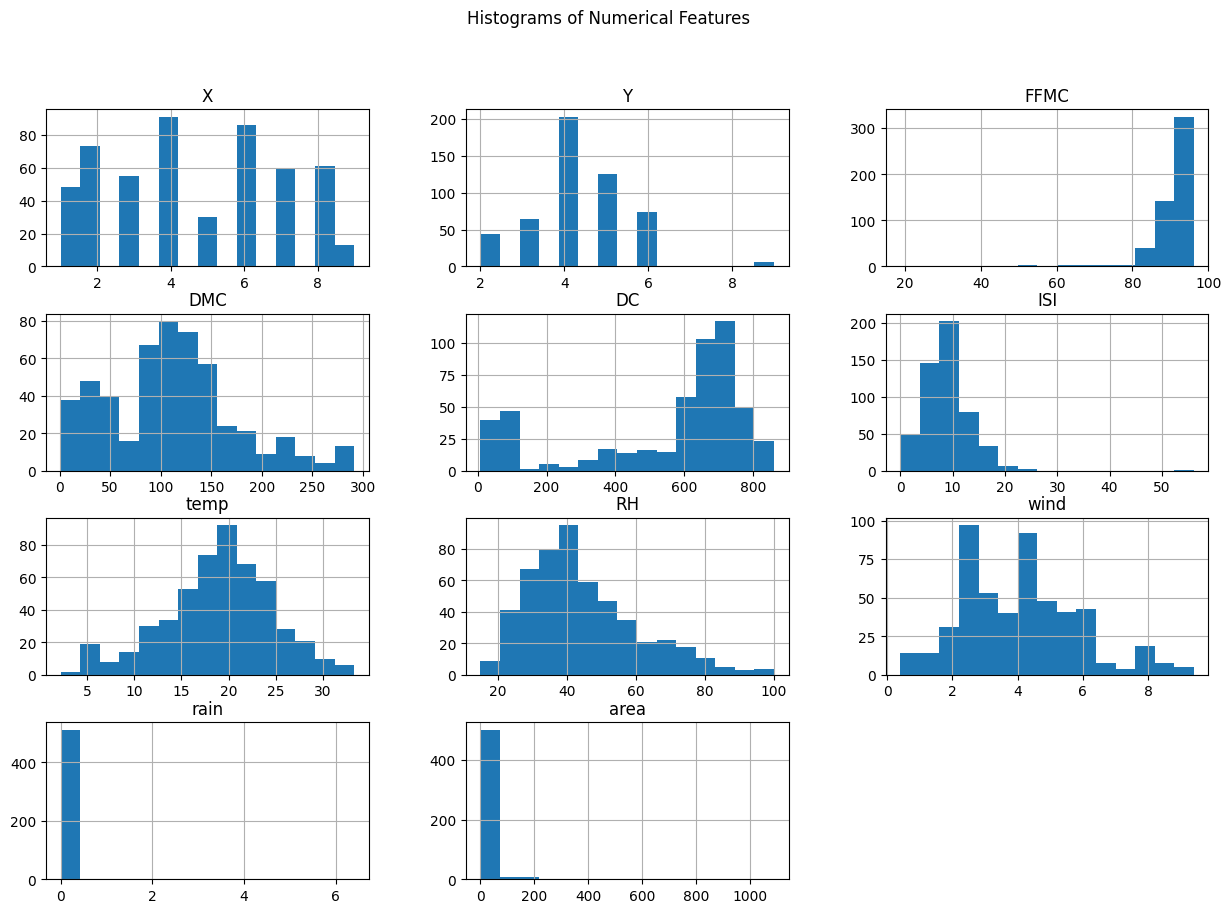

In [180]:
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

data[numerical_features].hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

- Check if there are any outliers in the dataset. If so, handle them.

<Axes: >

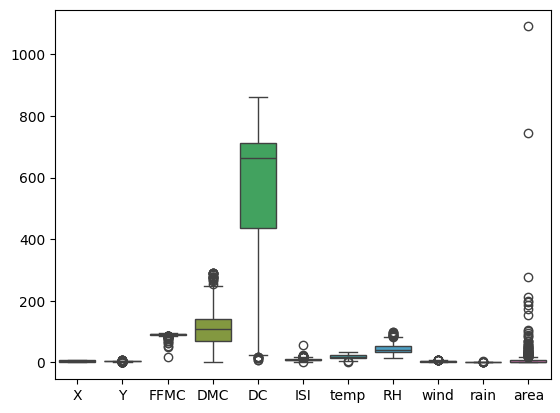

In [181]:
sns.boxplot(data=data[numerical_features])

In [182]:
# handle outliers
Q1 = data["area"].quantile(0.25)
Q3 = data["area"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data["area"] = np.where(
    data["area"] > upper_bound,
    upper_bound,
    np.where(data["area"] < lower_bound, lower_bound, data["area"]),
)

- Perform feature scaling on the dataset. Choose the appropriate scaling technique.

In [183]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[numerical_features])

data_scaled = pd.DataFrame(scaled_features, columns=numerical_features)

- Build a multiple linear regression model and evaluate the model using the metrics root mean squared error and r2 score. Provide your observations about the metrics.

In [184]:
# split data (80:20)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# build model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Train RMSE: {train_rmse}, Train R2: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test R2: {test_r2}")


Train RMSE: 1.3160501666412998, Train R2: 0.08341721604986785
Test RMSE: 1.5170737165579726, Test R2: -0.047159971473461404


- The RMSE values (1.3161 for training and 1.5171 for testing) are around 1.3–1.5. As the target variable (area) has a large range, this result might be relatively small, indicating that the model is fairly accurate.
- Since the performance difference between training and testing is small, it is likely that overfitting of the model has not occurred.
- The R² score for the training data is low at 0.08134, meaning that the model explains little variance in the training data.
- The R² score for the test data is -0.04716, which means that the model predicts worse than it predicts the mean.

### Part 2

- Split the dataset as 60:40.

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.4, random_state=42)

- Build the multiple linear regression model and evaluate the model using the metrics root mean squared error and r2 score. Provide your observations about the metrics.

In [186]:
# build model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Train RMSE: {train_rmse}, Train R2: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test R2: {test_r2}")

Train RMSE: 1.3167226658183655, Train R2: 0.09100561786206629
Test RMSE: 1.4394268492802533, Test R2: -0.026486383016359083


- Train RMSE: 1.317 indicates a moderate error in predictions on the training data.
- Train R²: 0.091 shows that the model explains only a small portion of the variance in the training data, meaning the fit is poor.
- Test RMSE: 1.439 is slightly higher than the training RMSE, suggesting that the model doesn't generalize well to unseen data.
- Test R²: -0.026 is very low, indicating that the model performs worse than a simple mean-based model on the test data.

- As a conclusion, provide which model performed better

The 6:4 split shows relatively better performance.
- Test RMSE:
    - 8:2 split: 1.517
    - 6:4 split: 1.439  
    - The 6:4 split has a slightly lower RMSE on the test data, indicating slightly better performance.

- Test R²:
    - 8:2 split: -0.047
    - 6:4 split: -0.026
    - The R² score is also slightly better for the 6:4 split, though both are very low, suggesting a minor improvement.

### Answer these questions in your notebook:

1. What does root mean square error mean in regression?
    - RMSE is a measure of the accuracy of a regression model and is the square root of the mean of the squares of the errors between the predicted and actual values; the smaller the RMSE, the closer the model is predicting the actual data.
2. In general, what does best fit line mean in regression and why is it important?
    - The best fit line is the line that best fits the data points and represents the relationship between the predictor variable and the objective variable. This is important for understanding trends in the data and making future predictions.
3. Can this problem be converted to a classification problem? If so, how?
    - It can be converted into a classification problem by converting "area" into a categorical variable. In this case, we would treat area as a class label and use a classification algorithm.
